# Ludwigsvorstadt-Isarvorstadt

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split

from bikesharing.ml_logic.model import get_folds, train_test_indices
from bikesharing.interface.main import *
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

In [10]:
df_X = pd.read_csv('~/.lewagon/bikesharing/data/processed/X_processed_from_2019_to_2022.csv')
df_y = pd.read_csv('~/.lewagon/bikesharing/data/processed/y_processed_from_2019_to_2022.csv')

In [11]:
df_X

,Unnamed: 0,is_holiday,is_weekend,temperature_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos
0,0,1,0,0.355408,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
1,1,1,0,0.357616,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
2,2,1,0,0.359823,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
3,3,1,0,0.359823,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
4,4,1,0,0.359823,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,0,1,0.426049,0.405204,0.202532,0.000000,0.066987,0.750000,0.50,1.000000,0.500000,1.000000,0.099031,0.801938
35036,35036,0,1,0.412804,0.395911,0.172152,0.000000,0.146447,0.853553,0.50,1.000000,0.500000,1.000000,0.099031,0.801938
35037,35037,0,1,0.410596,0.390335,0.182278,0.000000,0.250000,0.933013,0.50,1.000000,0.500000,1.000000,0.099031,0.801938
35038,35038,0,1,0.417219,0.390335,0.222785,0.000000,0.370590,0.982963,0.50,1.000000,0.500000,1.000000,0.099031,0.801938


In [12]:
df_X.drop(columns='Unnamed: 0')

,is_holiday,is_weekend,temperature_2m,apparent_temperature,windspeed_10m,precipitation,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos
0,1,0,0.355408,0.342007,0.227848,0.017391,0.629410,0.982963,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
1,1,0,0.357616,0.340149,0.245570,0.008696,0.750000,0.933013,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
2,1,0,0.359823,0.336431,0.303797,0.017391,0.853553,0.853553,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
3,1,0,0.359823,0.332714,0.341772,0.008696,0.933013,0.750000,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
4,1,0,0.359823,0.332714,0.356962,0.000000,0.982963,0.629410,0.75,0.933013,0.600779,0.989739,1.000000,0.356896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0,1,0.426049,0.405204,0.202532,0.000000,0.066987,0.750000,0.50,1.000000,0.500000,1.000000,0.099031,0.801938
35036,0,1,0.412804,0.395911,0.172152,0.000000,0.146447,0.853553,0.50,1.000000,0.500000,1.000000,0.099031,0.801938
35037,0,1,0.410596,0.390335,0.182278,0.000000,0.250000,0.933013,0.50,1.000000,0.500000,1.000000,0.099031,0.801938
35038,0,1,0.417219,0.390335,0.222785,0.000000,0.370590,0.982963,0.50,1.000000,0.500000,1.000000,0.099031,0.801938


In [13]:
df_y

,Altstadt-Lehel,Au - Haidhausen,Aubing-Lochhausen-Langwied,Berg am Laim,Bogenhausen,Feldmoching,Hadern,Harlaching,Hasenbergl-Lerchenau Ost,Laim,...,Schwanthalerhöhe,Sendling,Sendling-Westpark,Südgiesing,Thalkirchen,Trudering,Trudering-Riem,Untergiesing,Untergiesing-Harlaching,Untermenzing-Allach
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,5.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3.0,5.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0
35036,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
35037,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35038,5.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
df_X_y = pd.concat((df_X, df_y) , axis=1)

In [15]:
districts = ['Altstadt-Lehel', 'Au - Haidhausen',
       'Aubing-Lochhausen-Langwied', 'Berg am Laim', 'Bogenhausen',
       'Feldmoching', 'Hadern', 'Harlaching', 'Hasenbergl-Lerchenau Ost',
       'Laim', 'Lochhausen', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt',
       'Milbertshofen-Am Hart', 'Moosach', 'Neuhausen-Nymphenburg',
       'Obergiesing', 'Obermenzing', 'Obersendling', 'Pasing',
       'Pasing-Obermenzing', 'Ramersdorf-Perlach', 'Schwabing-Freimann',
       'Schwabing-West', 'Schwanthalerhöhe', 'Sendling', 'Sendling-Westpark',
       'Südgiesing', 'Thalkirchen', 'Trudering', 'Trudering-Riem',
       'Untergiesing', 'Untergiesing-Harlaching', 'Untermenzing-Allach']

In [16]:
fold_dfs = get_folds(df_X_y, fold_length=FOLD_LENGTH, fold_stride=FOLD_STRIDE)

In [19]:
len(fold_dfs)

4

# XGBoost Model Fine-Tune

In [34]:
district = 'Ludwigsvorstadt-Isarvorstadt'

xgb_r = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, max_depth=5, seed = 123)

test_df = fold_dfs[3]
train_folds = fold_dfs[0:3]
        
train_df = pd.concat(train_folds, axis=0)
X_test = test_df.drop(columns= districts)
y_test = test_df[district]
X_train = train_df.drop(columns= districts)
y_train = train_df[district]
        

        
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)

# r2, RMSE, and RMSLE Scores
scores_r2 = r2_score(y_test , y_pred)
scores_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#scores_rmsle = np.sqrt(mean_squared_log_error(y_test , y_pred))
print(f"R2 Score={scores_r2}")
print(f"RMSE Score={scores_rmse}")
#print(f"MSLE Score={scores_rmsle}")

R2 Score=0.5874010097312568
RMSE Score=4.843539322856675


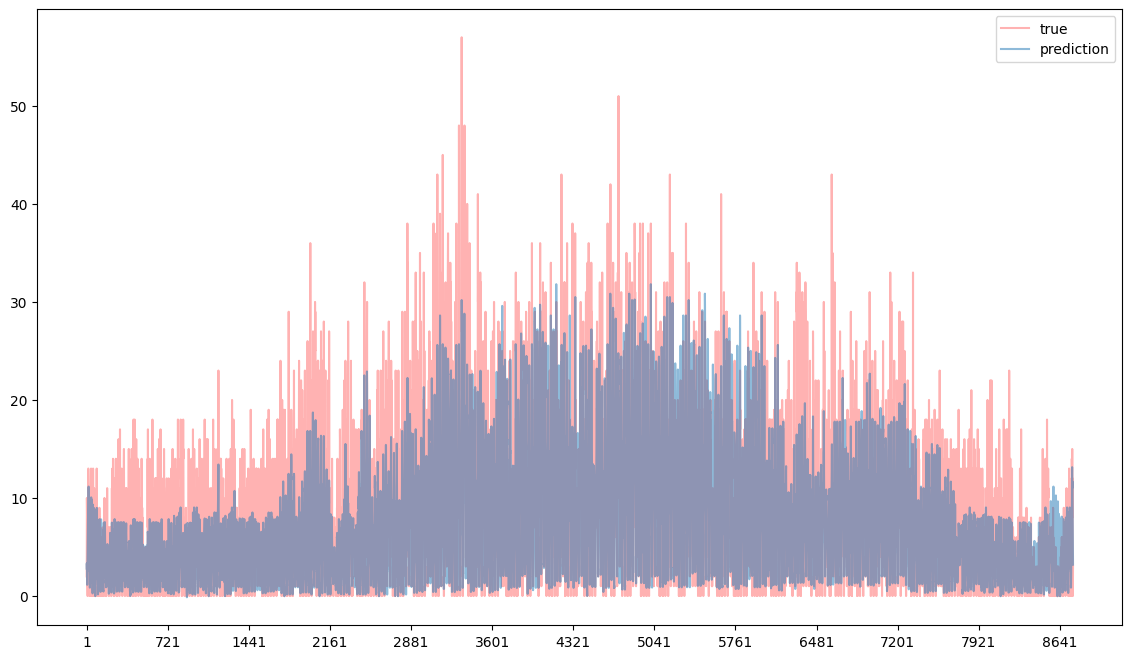

In [35]:
plt.figure(figsize=(14,8))
plt.plot(range(len(y_test)), y_test, c='r', alpha=0.3, label='true')
plt.plot(range(len(y_pred)), y_pred, alpha=0.5, label='prediction')

plt.xticks(np.arange(1, 8769, 720))
plt.legend()

## GridSearch XGBoost

In [66]:
district = 'Ludwigsvorstadt-Isarvorstadt'

test_df = fold_dfs[3]
train_folds = fold_dfs[0:3]
        
train_df = pd.concat(train_folds, axis=0)
X_test = test_df.drop(columns= districts)
y_test = test_df[district]
X_train = train_df.drop(columns= districts)
y_train = train_df[district]


# Instantiate model
xgb_r = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, eta = 0.3, 
                     max_depth=10, seed = 123, tree_method= "approx", min_child_weight=5, verbosity= 2)
        

#fitting the train data on model       
xgb_r.fit(X_train, y_train)
#predict data
y_pred = [x if x >= 0 else 0 for x in xgb_r.predict(X_test)]

# r2, RMSE, and RMSLE Scores
scores_r2 = r2_score(y_test , y_pred)
scores_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
scores_rmsle = np.sqrt(mean_squared_log_error(y_test , y_pred))
print(f"R2 Score={scores_r2}")
print(f"RMSE Score={scores_rmse}")
print(f"MSLE Score={scores_rmsle}")

[16:00:22] INFO: ../src/data/simple_dmatrix.cc:103: Generating new Gradient Index.
R2 Score=0.5727600309009508
RMSE Score=4.928726132970897
MSLE Score=0.569602056642951
